In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


In [5]:
l1=[col  for col in diabetes_df.columns if col!="Outcome"]
l1.append("Outcome")
diabetes_df=diabetes_df[l1]
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,M,148,72,35,0,33.6,0.627,50,2508.3,No,6,1
1,1,F,85,66,29,0,26.6,0.351,31,2760.0,Evening,8,0
2,0,M,183,64,0,0,23.3,0.672,32,6480.0,Morning,8,1
3,1,F,89,66,23,94,28.1,0.167,21,NaN,Evening,8,0
4,0,M,137,40,35,168,43.1,2.288,33,1970.0,No,9,1


## Data Clean


In [6]:
def data_clean(df=None):
        df["Exercise"]=df["Exercise"].replace({"No":1,"Evening":2,"Morning":3,"Both":4}).astype(int)
        df["Gender"]=df["Gender"].replace({"M":1,"F":0}).astype(int)
        df["CalorieIntake"].fillna(df["CalorieIntake"].median(),inplace=True)
        return df
    
    
diabetes_df_clean=data_clean(diabetes_df)

In [7]:
diabetes_df_clean.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,1,148,72,35,0,33.6,0.627,50,2508.3,1,6,1
1,1,0,85,66,29,0,26.6,0.351,31,2760.0,2,8,0
2,0,1,183,64,0,0,23.3,0.672,32,6480.0,3,8,1
3,1,0,89,66,23,94,28.1,0.167,21,2893.0,2,8,0
4,0,1,137,40,35,168,43.1,2.288,33,1970.0,1,9,1


In [8]:
continue_feature=['Glucose',                 # part1 
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'CalorieIntake',
 'Outcome']  

Lda_df=diabetes_df_clean

In [9]:
X=Lda_df.iloc[:,:-1]
y=Lda_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

## Visuliazation Of Data by LDA


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1=LinearDiscriminantAnalysis("eigen")

X_r1=clf1.fit(X,y).transform(X)
l2=np.arange(0,len(X_r1))

lda_df=pd.DataFrame(data=np.column_stack([X_r1,diabetes_df_clean["Outcome"],l2]),columns=["X_r1","Outcome","l2"])

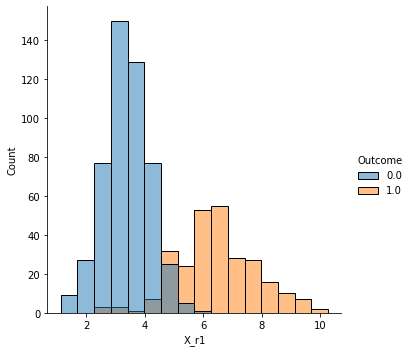

In [11]:
sns.displot(x=lda_df["X_r1"],hue=lda_df["Outcome"])

<AxesSubplot:xlabel='l2', ylabel='X_r1'>

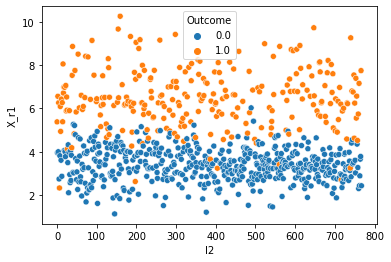

In [12]:
sns.scatterplot(x=lda_df["l2"],y=lda_df["X_r1"],hue=lda_df["Outcome"])

## PCA

In [58]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
X_embedded=pca.fit_transform(X)

pca_df=pd.DataFrame(data=X_embedded,columns=["x1","x2"])
pca_df["Outcome"]=y

<AxesSubplot:xlabel='x1', ylabel='x2'>

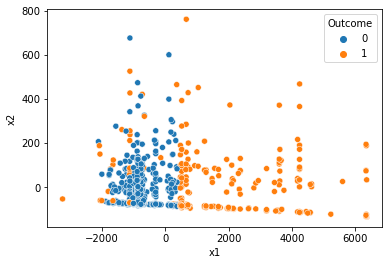

In [59]:
sns.scatterplot(data=pca_df,x='x1',y="x2",hue="Outcome")

In [90]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    X=X
    y=y
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        
        
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label="0", s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label="1", s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

In [91]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

y_pca = pca_df["Outcome"]
X_pca = pca_df.iloc[:, :-1]
X_pca=sc.fit_transform(X_pca)
b = RandomUnderSampler(sampling_strategy=1)
X_pca_balance, y_pca_balance = b.fit_resample(X_pca, y_pca)

X_pca_balance_train, X_pca_balance_test, y_pca_balance_train, y_pca_balance_test = train_test_split(
    X_pca_balance, y_pca_balance)

In [92]:
X_pca_balance_test

array([[-0.72534571, -0.62140941],
       [-0.66847297,  0.75265476],
       [-0.51507586, -0.01568874],
       [ 0.39036603,  0.91430587],
       [-0.53039409,  1.10586916],
       [-0.18065636,  1.79793042],
       [-0.56275857, -0.61884286],
       [-0.44348381,  0.06606248],
       [ 0.30570895, -0.80804579],
       [-0.61041693, -0.60022943],
       [-0.52710359, -0.31335298],
       [-0.45989884, -0.63297068],
       [ 0.46094298, -0.74594361],
       [-0.20923438,  0.54602242],
       [ 3.77645939, -1.07393208],
       [-0.66452221,  0.32628334],
       [-0.43108734,  1.04143115],
       [ 0.30621328, -0.72621125],
       [-0.39603821, -0.62382233],
       [ 0.43114799, -0.73553659],
       [ 0.30629713, -0.68404594],
       [-0.6641841 ,  2.07352971],
       [-0.72542951, -0.62603353],
       [ 0.1235209 , -0.24961922],
       [-0.39568285,  0.2667505 ],
       [ 2.5212303 ,  0.70768666],
       [-0.40232542, -0.6761725 ],
       [-0.53029733,  1.07077141],
       [ 0.38364759,

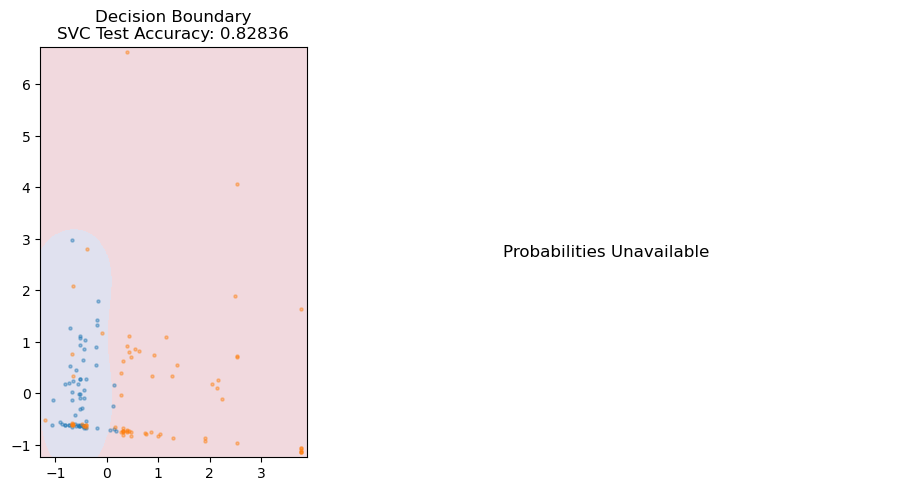

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
model = SVC()
model.fit(X_pca_balance_train, y_pca_balance_train)
model.score(X_pca_balance_test,y_pca_balance_test)
plot_mushroom_boundary(X_pca_balance_test, y_pca_balance_test, model)

### classfication using LDA

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9270833333333334

## T-SNE

In [16]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,perplexity=30.0,n_iter=5000).fit_transform(X)
X_embedded.shape

(768, 2)

In [17]:
t_sne_df=pd.DataFrame(data=X_embedded,columns=["x1","x2"])
t_sne_df["Outcome"]=y

In [18]:
t_sne_df

,x1,x2,Outcome
0,40.115791,-21.895599,1
1,33.471294,14.436880,0
2,-29.581059,-24.706078,1
3,11.657751,24.985723,0
4,18.429247,-32.364784,1
...,...,...,...
763,12.041840,19.928675,0
764,-23.282074,55.345741,0
765,-27.010969,55.971645,0
766,-24.936596,-36.814793,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

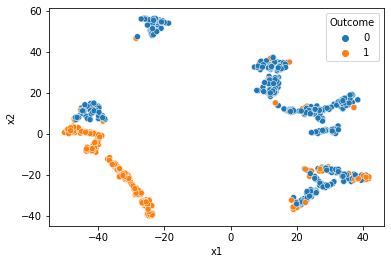

In [19]:
sns.scatterplot(data=t_sne_df,x='x1',y="x2",hue='Outcome')

## General Class for ml model validation

In [25]:
class Ml_Model(object):

    def __init__(self, *arg, scaling=False, balance=False, Oversampling=False):
        import numpy as np
        self.X = arg[0]
        self.y = arg[1]
        if balance:

            if not Oversampling:
                from imblearn.under_sampling import RandomUnderSampler
                b = RandomUnderSampler(sampling_strategy=1)
                self.X, self.y = b.fit_resample(self.X, self.y)

            else:
                from imblearn.over_sampling import RandomOverSampler
                b = RandomOverSampler(sampling_strategy=1)
                self.X, self.y = b.fit_resample(self.X, self.y)

        if not scaling:
            from sklearn.model_selection import train_test_split
            from sklearn.preprocessing import StandardScaler
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y)

        else:
            from sklearn.model_selection import train_test_split
            from sklearn.preprocessing import StandardScaler
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y)

            sc = StandardScaler()
            self.X_train = sc.fit_transform(self.X_train)
            self.X_test = sc.transform(self.X_test)

    def pass_classifier(self, clf=None):
        self.clf = clf
        print(clf)

        return self.clf

    def fit_method_and_score(self):

        clf.fit(self.X_train, self.y_train)
       
        
        return clf.predict(X_test)

    def classification_report(self):
        self.y_pred = self.clf.predict(self.X_test)
        from sklearn.metrics import classification_report
        return print(classification_report(self.y_test, self.y_pred))

    def validation(self):

        from sklearn.model_selection import StratifiedKFold
        from sklearn.metrics import f1_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from colorama import Fore, Back, Style

        lst_accu_stratified = []
        lst_recall_stratified = []
        lst_precision_stratified = []

        lst_f1_score_stratified = []
        x = 0
        skf = StratifiedKFold(n_splits=18, shuffle=True, random_state=1)
        for train_index, test_index in skf.split(self.X, self.y):
            x_train_fold, x_test_fold = self.X.loc[train_index,
                                                   :], self.X.loc[test_index, :]
            y_train_fold, y_test_fold = self.y[train_index], self.y[test_index]
            self.clf.fit(x_train_fold, y_train_fold)
            y_pre = clf.predict(self.X_test)
#                 print(classification_report(self.y_test,y_pre))

            lst_accu_stratified.append(
                round(accuracy_score(self.y_test, y_pre), 4))
            lst_recall_stratified.append(
                round(recall_score(self.y_test, y_pre), 4))
            lst_f1_score_stratified.append(
                round(f1_score(self.y_test, y_pre), 4))
            lst_precision_stratified.append(
                round(precision_score(self.y_test, y_pre), 4))

        for i, j in zip(["Accuracy", "Recall", "Precision", "F1-Score"], [lst_accu_stratified, lst_recall_stratified, lst_precision_stratified, lst_f1_score_stratified]):

            print(Fore.BLUE+f"\n\n{i} ")
            print(Style.RESET_ALL)

            print(f'List of possible {i} Score:\n', j)

            print(f'\nMaximum {i} Score That can be obtained from this model is:', max(
                j)*100, '%')
            print(f'\nMinimum {i} Score:', min(j)*100, '%')
            print(
                f'\nAverage {i} Score That can be obtained from this model is::', np.mean(j))
            print(
                f'\nMedian {i} Score That can be obtained from this model is::', np.median(j))
            print('\nStandard Deviation is:', np.std(j))

        return None

    

## LDA 

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m1=Ml_Model(X,y,True,balance=True,Oversampling=False)
clf=LinearDiscriminantAnalysis()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        67
           1       0.89      0.88      0.89        67

    accuracy                           0.89       134
   macro avg       0.89      0.89      0.89       134
weighted avg       0.89      0.89      0.89       134



Accuracy 

List of possible Accuracy Score:
 [0.903, 0.9104, 0.9104, 0.9328, 0.9104, 0.9104, 0.903, 0.9104, 0.9104, 0.903, 0.9104, 0.903, 0.9104, 0.9179, 0.9179, 0.9104, 0.9179, 0.903]

Maximum Accuracy Score That can be obtained from this model is: 93.28 %

Minimum Accuracy Score: 90.3 %

Average Accuracy Score That can be obtained from this model is:: 0.9108388888888889

Median Accuracy Score That can be obtained from this model is:: 0.9104

Standard Deviation is: 0.00722973327377134


Recall 

List of possible Recall Score:
 [0.8657, 0.8955, 0.8806, 0.9254, 0.8806, 0.8806, 0.8657, 0.8806, 0.8806, 0.8806, 0.8806, 0.8657, 0.8806, 0.9

## QDA

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m1=Ml_Model(X,y,balance=True)
clf=QuadraticDiscriminantAnalysis()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

QuadraticDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.94      0.93      0.94        70

    accuracy                           0.93       134
   macro avg       0.93      0.93      0.93       134
weighted avg       0.93      0.93      0.93       134



Accuracy 

List of possible Accuracy Score:
 [0.9403, 0.9328, 0.9403, 0.9403, 0.9328, 0.9478, 0.9403, 0.9478, 0.9328, 0.9328, 0.9552, 0.9328, 0.9403, 0.9478, 0.9403, 0.9403, 0.9403, 0.9328]

Maximum Accuracy Score That can be obtained from this model is: 95.52000000000001 %

Minimum Accuracy Score: 93.28 %

Average Accuracy Score That can be obtained from this model is:: 0.9398777777777778

Median Accuracy Score That can be obtained from this model is:: 0.9403

Standard Deviation is: 0.0063467012915333285


Recall 

List of possible Recall Score:
 [0.9143, 0.9143, 0.9429, 0.9429, 0.9286, 0.9286, 0.9286, 0.9286, 0.9286, 0.9286, 0.94

## SVM

In [50]:
from sklearn.svm import SVC
m1=Ml_Model(X,y,scaling=True,balance=True)
clf=SVC(C=8)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

SVC(C=8)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.97      0.96      0.96        67

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



Accuracy 

List of possible Accuracy Score:
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Maximum Accuracy Score That can be obtained from this model is: 50.0 %

Minimum Accuracy Score: 50.0 %

Average Accuracy Score That can be obtained from this model is:: 0.5

Median Accuracy Score That can be obtained from this model is:: 0.5

Standard Deviation is: 0.0


Recall 

List of possible Recall Score:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Recall Score That can be obtained from this model is: 100.0 %

Minimum Recall Score: 100.0 %

Average Recall Sco



<h2> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Logistics Regression</a> </h2>

In [29]:
from sklearn.linear_model import LogisticRegression

m1=Ml_Model(X,y,scaling=True,balance=True)
clf=LogisticRegression(max_iter=1000,C=1)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

LogisticRegression(C=1, max_iter=1000)
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.97      0.93      0.95        73

    accuracy                           0.95       134
   macro avg       0.95      0.95      0.95       134
weighted avg       0.95      0.95      0.95       134



C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite



Accuracy 

List of possible Accuracy Score:
 [0.5149, 0.4552, 0.4552, 0.5149, 0.4552, 0.4552, 0.4627, 0.5149, 0.4552, 0.4552, 0.5, 0.7015, 0.5224, 0.4851, 0.4851, 0.5373, 0.4552, 0.4851]

Maximum Accuracy Score That can be obtained from this model is: 70.15 %

Minimum Accuracy Score: 45.519999999999996 %

Average Accuracy Score That can be obtained from this model is:: 0.49501666666666666

Median Accuracy Score That can be obtained from this model is:: 0.4851

Standard Deviation is: 0.05716492951685209


Recall 

List of possible Recall Score:
 [0.1096, 0.0, 0.0, 0.1096, 0.0, 0.0, 0.0137, 0.1096, 0.0, 0.0, 0.0822, 0.4521, 0.1233, 0.0548, 0.0548, 0.1507, 0.0, 0.0548]

Maximum Recall Score That can be obtained from this model is: 45.21 %

Minimum Recall Score: 0.0 %

Average Recall Score That can be obtained from this model is:: 0.07306666666666667

Median Recall Score That can be obtained from this model is:: 0.0548

Standard Deviation is: 0.10493401101009465


Precision 

List of pos

C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## MLP Classifier

In [24]:
from sklearn.neural_network import MLPClassifier

m1=Ml_Model(X,y,scaling=True,balance=True)
clf=MLPClassifier()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

MLPClassifier()
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        71
           1       0.92      0.87      0.89        63

    accuracy                           0.90       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134



C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(




Accuracy 

List of possible Accuracy Score:
 [0.6866, 0.8134, 0.6567, 0.8433, 0.7761, 0.7836, 0.7239, 0.709, 0.709, 0.709, 0.8358, 0.7463, 0.597, 0.791, 0.7239, 0.6716, 0.791, 0.6866]

Maximum Accuracy Score That can be obtained from this model is: 84.33 %

Minimum Accuracy Score: 59.699999999999996 %

Average Accuracy Score That can be obtained from this model is:: 0.7363222222222222

Median Accuracy Score That can be obtained from this model is:: 0.7239

Standard Deviation is: 0.06438144621926377


Recall 

List of possible Recall Score:
 [0.8571, 0.7619, 0.8254, 0.746, 0.7937, 0.8095, 0.4286, 0.4762, 0.381, 0.5238, 0.746, 0.7619, 0.9206, 0.5873, 0.7937, 0.3016, 0.8095, 0.3333]

Maximum Recall Score That can be obtained from this model is: 92.06 %

Minimum Recall Score: 30.159999999999997 %

Average Recall Score That can be obtained from this model is:: 0.6587277777777777

Median Recall Score That can be obtained from this model is:: 0.75395

Standard Deviation is: 0.19354707668952

<h2> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNN Algorithms</a> </h2>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
m1=Ml_Model(X,y,balance=True)
clf=KNeighborsClassifier(p=1.5,n_jobs=-1,n_neighbors=5,weights="distance") 
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

KNeighborsClassifier(n_jobs=-1, p=1.5, weights='distance')
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        67
           1       0.89      0.87      0.88        67

    accuracy                           0.88       134
   macro avg       0.88      0.88      0.88       134
weighted avg       0.88      0.88      0.88       134



Accuracy 

List of possible Accuracy Score:
 [0.9851, 0.9851, 0.9925, 1.0, 0.9851, 1.0, 1.0, 0.9851, 0.9925, 1.0, 1.0, 0.9925, 0.9925, 0.9925, 0.9925, 1.0, 0.9851, 1.0]

Maximum Accuracy Score That can be obtained from this model is: 100.0 %

Minimum Accuracy Score: 98.50999999999999 %

Average Accuracy Score That can be obtained from this model is:: 0.9933611111111111

Median Accuracy Score That can be obtained from this model is:: 0.9925

Standard Deviation is: 0.006028648170645902


Recall 

List of possible Recall Score:
 [1.0, 0.9851, 0.9851, 1.0, 0.9851, 1.0, 1.0, 0.9851, 1.0, 1.0, 1.0, 0.9851, 0.98

## Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier
m1=Ml_Model(X,y,balance=True)
clf=DecisionTreeClassifier(max_leaf_nodes=6,max_depth=4,max_features=5)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()

DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=6)
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        66
           1       1.00      0.66      0.80        68

    accuracy                           0.83       134
   macro avg       0.87      0.83      0.82       134
weighted avg       0.87      0.83      0.82       134



Accuracy 

List of possible Accuracy Score:
 [0.9925, 0.9179, 0.9925, 0.9478, 0.9552, 0.9701, 0.9254, 0.9925, 0.9925, 0.9328, 0.9627, 0.9179, 0.9925, 0.9627, 0.9925, 0.9104, 0.9925, 0.9925]

Maximum Accuracy Score That can be obtained from this model is: 99.25 %

Minimum Accuracy Score: 91.03999999999999 %

Average Accuracy Score That can be obtained from this model is:: 0.9634944444444444

Median Accuracy Score That can be obtained from this model is:: 0.9663999999999999

Standard Deviation is: 0.030240379043447174


Recall 

List of possible Recall Score:
 [0.9853, 0.8824, 0.9853, 0.8971, 0.9

## Random Forest

In [27]:

from sklearn.ensemble import RandomForestClassifier
m1=Ml_Model(X,y)
clf=RandomForestClassifier(n_estimators=50,max_leaf_nodes=30)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()


RandomForestClassifier(max_leaf_nodes=30, n_estimators=50)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       1.00      0.97      0.98        61

    accuracy                           0.99       192
   macro avg       0.99      0.98      0.99       192
weighted avg       0.99      0.99      0.99       192



Accuracy 

List of possible Accuracy Score:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9896, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy Score That can be obtained from this model is: 100.0 %

Minimum Accuracy Score: 98.96000000000001 %

Average Accuracy Score That can be obtained from this model is:: 0.9994222222222222

Median Accuracy Score That can be obtained from this model is:: 1.0

Standard Deviation is: 0.002382238805912418


Recall 

List of possible Recall Score:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9672, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Recall Sco